In [10]:
import pandas as pd

titanic = pd.read_csv('../data/titanic.csv')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 그래프 크기 조절
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,2)
# 한글 폰트 적용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [13]:
# 대립가설 : 생존여부(범주형)에 따른 나이(수치형)의 차이가 있다.
# 집단별 나이 데이터
s0 = titanic[titanic['Survived'] == 0]['Age'].dropna()
s1 = titanic[titanic['Survived'] == 1]['Age'].dropna()

Text(0.5, 1.0, '생존자')

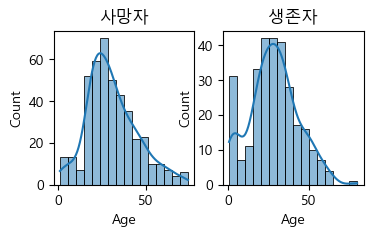

In [14]:
plt.subplot(1,2,1)
sns.histplot(s0, kde=True)
plt.title('사망자')
plt.subplot(1,2,2)
sns.histplot(s1, kde=True)
plt.title('생존자')

<Axes: xlabel='Age', ylabel='Count'>

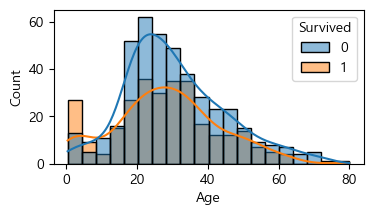

In [15]:
sns.histplot(data = titanic, x = 'Age', hue = 'Survived', kde=True)

In [16]:
# 1. 두 집단의 정규성 검정
    # 1-1. 정규성을 만족했을때
        # 2. 독립성을 확인
            # 2-1. 독립성을 만족했을때
                # 3. 등분산성 검정
                    # 3-1. 등분산성을 만족했을때
                        # 4. 독립표본 t 검정 시행(등분산 = True)
                    # 3-2. 등분산성을 만족하지 않을때
                        # 4. 독립표본 t 검정 시행(등분산 = False)
            # 2-2. 독립성을 만족하지 않을때
                # 3. 대응표본 t 검정 시행
    # 1-2. 정규성을 만족하지 않을때
        # 2. 맨-휘트니 유 검정을 시행

In [17]:
# shapiro, 데이터가 5천개 이하
# anderson, 데이터가 5천개 초과
# kal.... (kstest) , 데이터가 5천개 초과
from scipy import stats

stats.shapiro(titanic['Age'].dropna())

ShapiroResult(statistic=0.981458306312561, pvalue=7.340329943872348e-08)

In [18]:
stats.anderson(titanic['Age'].dropna())

AndersonResult(statistic=3.8230373853616584, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=29.69911764705882, scale=14.526497332334044)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [19]:
stats.kstest(titanic['Age'].dropna(), 'norm')

KstestResult(statistic=0.9650366565902186, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)

In [20]:
# 집단별 정규성 검정
print(stats.shapiro(s0))
print(stats.shapiro(s1))

ShapiroResult(statistic=0.9689366221427917, pvalue=7.816021252438077e-08)
ShapiroResult(statistic=0.9827256798744202, pvalue=0.0014263729099184275)


In [21]:
# 1. 정규성 검정 > 정규성을 가지지 않는다
# 1-2. 정규성을 만족하지 않을때
    # 2. 맨-휘트니 유 검정을 시행
stats.mannwhitneyu(s0, s1)

# 결론 : 맨-휘트니 유 검정의 귀무가설은 두 집단의 평균차이가 없다 이다.
# 따라서 p-value값이 0.05보다 크므로 귀무가설을 기각하지 않는다.
# 귀무가설인 두 집단의 평균차이가 없다가 사실이다.
# 즉, 두 집단의 차이가 없다 > 생존여부에 따른 나이차이가 없다.

MannwhitneyuResult(statistic=65278.0, pvalue=0.16049252477737763)

In [22]:
# 1. 정규성 검정 > 정규성을 가진다 였으면
# 1-1. 정규성을 만족했을때
    # 2. 독립성 확인
        # 두 집단의 겹치는 데이터가 있는지 확인 > 대부분의 독립성을 가진다.
        

In [23]:
# 2-1. 독립성을 만족했을때
    # 3. 등분산성 검정 , 귀무가설 : 두 집단이 등분산을 가진다.
print(stats.bartlett(s0, s1))
print(stats.levene(s0, s1))
print(stats.fligner(s0, s1))
# p-value가 0.05보다 크므로 귀무가설을 기각하지 않는다.
# 따라서, 두 집단은 등분산을 가진다.

BartlettResult(statistic=0.9875502654050705, pvalue=0.32034184898205253)
LeveneResult(statistic=1.1953828843934424, pvalue=0.27461621560000243)
FlignerResult(statistic=1.0436060696132083, pvalue=0.3069842761053375)


In [24]:
# 3-1. 등분산을 가진다.
    # 4. 독립표본 t 검정을 시행, 귀무가설 : 두 집단 평균의 차이가 없다.
stats.ttest_ind(s0, s1, equal_var=True)
# p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서, 두 집단 평균의 차이가 있다.
# 즉, 생존여부에 따른 나이차이가 있다.

TtestResult(statistic=2.06668694625381, pvalue=0.03912465401348249, df=712.0)

In [25]:
# 3-2. 등분산을 가지지 않는다.
    # 4. 독립표본 t 검정을 시행(등분산False), 귀무가설 : 두 집단 평균의 차이가 없다.
stats.ttest_ind(s0, s1, equal_var=False)

TtestResult(statistic=2.0460301043939704, pvalue=0.04118965162586639, df=598.841215388818)

In [26]:
stats.mannwhitneyu(s0, s1)
stats.ttest_ind(s0, s1, equal_var=True)
stats.ttest_ind(s0, s1, equal_var=False)

TtestResult(statistic=2.0460301043939704, pvalue=0.04118965162586639, df=598.841215388818)

<Axes: xlabel='Pclass', ylabel='Age'>

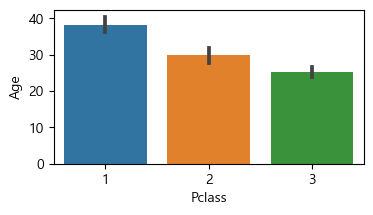

In [27]:
p1 = titanic[titanic['Pclass'] == 1]['Age'].dropna()
p2 = titanic[titanic['Pclass'] == 2]['Age'].dropna()
p3 = titanic[titanic['Pclass'] == 3]['Age'].dropna()
sns.barplot(x = 'Pclass', y = 'Age', data = titanic) 

In [28]:
# 일원배치 분산분석:F검정, ANOVA 검정
stats.f_oneway(p1, p2, p3) # 정규성O, 독립성O, 등분산성O
# 귀무가설 : 집단 간의 분산의 차이가 없다.
# p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서, 집단 간의 분산의 차이가 있다.
# 즉, 객식 등급에 따른 나이차이가 있다.

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [29]:
# 정규성을 가지지 않을때 집단이 3개 이상인 경우
stats.kruskal(p1, p2, p3) # 정규성x
# 귀무가설 : 집단 간의 분산의 차이가 없다.
# p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서, 집단 간의 분산의 차이가 있다.
# 즉, 객식 등급에 따른 나이차이가 있다.

KruskalResult(statistic=95.99479230295296, pvalue=1.4288798296552103e-21)

In [30]:
# !pip install pingouin

In [31]:
# 정규성을 가지면서 등분산성을 가지지 않을때 집단이 3개 이상인 경우
# 웰치스 분산분석 - 라이브러리 별도 설치(pingouin)
import pingouin as pg
titanic2 = titanic[['Pclass', 'Age']].dropna()
pg.welch_anova(data = titanic2, dv='Age', between='Pclass')
# 귀무가설 : 집단 간의 분산의 차이가 없다.
# p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서, 집단 간의 분산의 차이가 있다.
# 즉, 객식 등급에 따른 나이차이가 있다.

,Source,ddof1,ddof2,F,p-unc,np2
0,Pclass,2,359.443951,53.35479,5.126071e-21,0.139107


In [32]:
import statsmodels.api as sm
titanic2 = titanic[['Survived', 'Age', 'Fare', 'Pclass']].dropna()
model = sm.Logit(titanic2['Survived'], titanic2[['Age', 'Fare', 'Pclass']])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.608663
         Iterations 6
Age       1.871832e-02
Fare      4.136411e-09
Pclass    2.664293e-07
dtype: float64


### 여기부터

In [ ]:
import numpy as np
model.predict(np.array([29.0, 30.0, 2]))  ## predict: 클래스의 확률을 구함.

In [34]:
titanic2 = titanic[['Age', 'Fare']].dropna()
model = sm.OLS(titanic2['Age'], titanic2['Fare'])   ## 단순 선형회귀모형의 회귀모수 추정하는 방법: 최소제곱법(OLS)
result = model.fit()
result.pvalues

Fare    1.340082e-52
dtype: float64

In [ ]:
model.predict(np.array([32]))

<Axes: xlabel='Age', ylabel='Fare'>

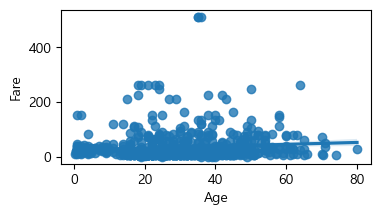

In [36]:
sns.regplot(data = titanic2, x = 'Age', y = 'Fare')

In [37]:
# 1. 두 집단의 정규성 검정
    # 1-1. 정규성을 만족했을때
        # 2. 독립성을 확인
            # 2-1. 독립성을 만족했을때
                # 3. 등분산성 검정
                    # 3-1. 등분산성을 만족했을때
                        # 4. 독립표본 t 검정 시행(등분산 = True)
                    # 3-2. 등분산성을 만족하지 않을때
                        # 4. 독립표본 t 검정 시행(등분산 = False)
            # 2-2. 독립성을 만족하지 않을때
                # 3. 대응표본 t 검정 시행
    # 1-2. 정규성을 만족하지 않을때
        # 2. 맨-휘트니 유 검정을 시행

In [38]:
# 대응표본
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
df.head()

,before,after
0,153,162
1,153,163
2,158,159
3,157,158
4,167,160


In [39]:
# 범주형 독립변수 : before, after 2개의 집단을 가지고 있다.
# 수치형 종속변수 : 그 집단의 값
before = df['before']
after = df['after']

In [40]:
# 1. 두 집단의 정규성 검정
print(stats.shapiro(before))
print(stats.shapiro(after))
    # 1-1. 정규성을 만족했을때
        # 2. 독립성을 확인
            # 2-2. 독립성을 만족하지 않을때
                # 3. 대응표본 t 검정 시행
    # 1-2. 정규성을 만족하지 않을때
        # 2. 윌콕슨 부호순위 랭크 검정
stats.wilcoxon(before, after, alternative='greater')

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)


C:\Users\admin\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=437.0, pvalue=0.939507952579736)

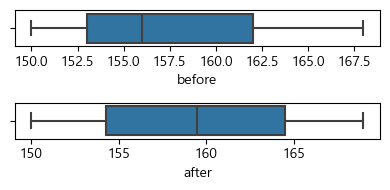

In [41]:
plt.subplot(2,1,1)
sns.boxplot(data = df, x = 'before')
plt.subplot(2,1,2)
sns.boxplot(data = df, x = 'after')
plt.tight_layout()

In [42]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')
df2.head()

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a


In [43]:
a = df2[df2['group'] == 'a']['rpm']
b = df2[df2['group'] == 'b']['rpm']

In [44]:
print(stats.shapiro(a))
print(stats.shapiro(b))

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)


<Axes: xlabel='rpm', ylabel='Count'>

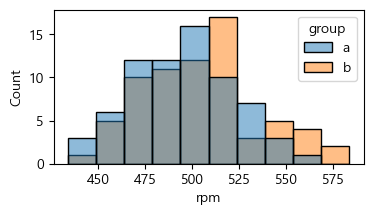

In [45]:
sns.histplot(data = df2, x = 'rpm', hue = 'group')

In [46]:
stats.bartlett(a, b)

BartlettResult(statistic=0.15889730141293185, pvalue=0.6901737800138499)

In [47]:
stats.ttest_rel(a, b) # 귀무가설 : 두 집단의 변화가 없다.
# 따라서 두 집단에 차이가 없다.

TtestResult(statistic=-1.9018108294460812, pvalue=0.06137132692892943, df=69)

In [48]:
stats.ttest_rel(a, b, alternative = 'less') # 귀무가설 : a보다 b가 값이 커졌다.
# 귀무가설을 기각하지 못한다. > 따라서 a보다 b가 더 크다.

TtestResult(statistic=-1.9018108294460812, pvalue=0.030685663464464715, df=69)